In [1]:
import struct
import sys
import math
import string
import numpy as np
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import wave



def plot_3charts(N, x, X, fs):
  freqList = np.fft.fftfreq(N,d=1.0/fs)

  amplitudeSpectrum = [np.sqrt(c.real ** 2  + c.imag ** 2 ) for c in X]
  phaseSpectrum     = [np.arctan2(np.float64(c.imag),np.float64(c.real)) for c in X]
  decibelSpectrum   = 10.0*np.log10(amplitudeSpectrum)

  plt.subplot(311)
  plt.plot(x)
  plt.axis([0,N,np.amin(x),np.amax(x)])
  plt.xlabel("time [sample]")
  plt.ylabel("amplitude")

  plt.subplot(312)
  plt.plot(freqList, decibelSpectrum,'.')
  plt.axis([0,fs/2,np.amin(decibelSpectrum),np.amax(decibelSpectrum)+10])
  plt.xlabel("frequency[Hz]")
  plt.ylabel("amplitude [dB]")

  plt.subplot(313)
  plt.xscale('log')
  plt.axis([10,fs/2,np.amin(decibelSpectrum),np.amax(decibelSpectrum)+10])
  plt.plot(freqList, decibelSpectrum,'.')
  plt.xlabel("frequency[Hz]")
  plt.ylabel("amplitude [dB]")

  #subplot(314)
  #xscale('linear')
  #plot(freqList, phaseSpectrum,".")
  #axis([0,fs/2,-np.pi,np.pi])
  #xlabel("frequency[Hz]")
  #ylabel("phase [rad]")


  plt.show()

In [2]:
i = np.linspace(200,200000, 5000)

In [3]:
i

array([   200.       ,    239.9679936,    279.9359872, ...,
       199920.0640128, 199960.0320064, 200000.       ])

In [4]:
def phi_func(f_list, Q, f0):
    phi_list = [(-np.pi/2 - np.arctan(2*Q*f/f0 + np.sqrt(4*Q**2-1)) - np.arctan(2*Q*f/f0 - np.sqrt(4*Q**2-1))) * 180 / np.pi for f in f_list]
    return phi_list

In [5]:
phis = phi_func(i, 1.41, 5500)

In [6]:
phis

[-91.47927516874044,
 -91.77575312266471,
 -92.07270062540587,
 -92.37019670790214,
 -92.66832078302586,
 -92.96715270111456,
 -93.26677280590032,
 -93.56726199088662,
 -93.86870175622026,
 -94.17117426610731,
 -94.47476240681952,
 -94.77954984533828,
 -95.08562108868196,
 -95.39306154396165,
 -95.70195757920919,
 -96.01239658501983,
 -96.32446703705155,
 -96.63825855941981,
 -96.95386198902652,
 -97.27136944085757,
 -97.5908743742837,
 -97.91247166039395,
 -98.23625765038969,
 -98.56233024506275,
 -98.89078896537787,
 -99.22173502417387,
 -99.55527139899517,
 -99.89150290605653,
 -100.23053627534021,
 -100.57248022681623,
 -100.91744554776828,
 -101.26554517119946,
 -101.61689425528175,
 -101.97161026380186,
 -102.32981304754438,
 -102.69162492653818,
 -103.0571707730781,
 -103.42657809541669,
 -103.79997712200144,
 -104.17750088611338,
 -104.55928531073982,
 -104.9454692934884,
 -105.33619479132304,
 -105.73160690487185,
 -106.1318539620228,
 -106.53708760048855,
 -106.94746284897975

Text(0, 0.5, 'amplitude [dB]')

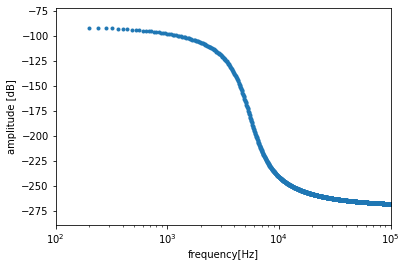

In [19]:
fs = 200000
phis = phi_func(i, 1.41, 5500)
plt.xscale('log')
plt.axis([100,fs/2,np.amin(phis)-20,np.amax(phis)+20])
plt.plot(i, phis,'.')
plt.xlabel("frequency[Hz]")
plt.ylabel("amplitude [dB]")

Text(0, 0.5, 'amplitude [dB]')

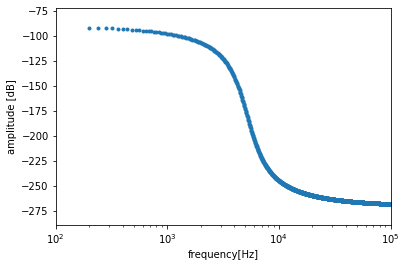

In [21]:
phis = phi_func(i, 1.5, 5200)
fs = 200000
plt.xscale('log')
plt.axis([100,fs/2,np.amin(phis)-20,np.amax(phis)+20])
plt.plot(i, phis,'.')
plt.xlabel("frequency[Hz]")
plt.ylabel("amplitude [dB]")